In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.cm as cm
import numpy as np
from PIL import Image
import cv2

[[[105 105 105]
  [105 105 105]
  [105 105 105]
  ..., 
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[105 105 105]
  [105 105 105]
  [105 105 105]
  ..., 
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[105 105 105]
  [105 105 105]
  [105 105 105]
  ..., 
  [110 110 110]
  [110 110 110]
  [110 110 110]]

 ..., 
 [[112 112 112]
  [111 111 111]
  [110 110 110]
  ..., 
  [115 115 115]
  [115 115 115]
  [115 115 115]]

 [[113 113 113]
  [113 113 113]
  [112 112 112]
  ..., 
  [115 115 115]
  [115 115 115]
  [115 115 115]]

 [[113 113 113]
  [115 115 115]
  [115 115 115]
  ..., 
  [115 115 115]
  [115 115 115]
  [115 115 115]]]


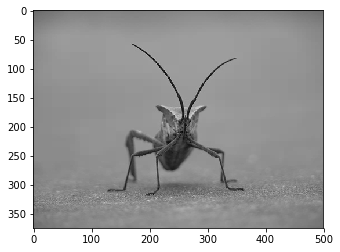

In [3]:
img = Image.open('stinkbug.png')
#img = img.convert('L') # convert the image to *greyscale*
img = np.array(img)



def quadCompress(img, i1, j1, i2, j2):
    
    smallest = 3
    thresh = 1
    
    if (i2-i1)+1 > smallest and (j2-j1)+1 > smallest:
        
        stdDev = np.std(img[j1:j2, i1:i2])
# if the pixels in a sub-array are not more or less the same,
# compress more, else change all pixels in sub-array to mean
        if stdDev > thresh:
            
            quadCompress(img, i1, j1, (i1+((i2-i1)/2))+1, (j1+((j2-j1)/2))+1)
            quadCompress(img, (i1+((i2-i1)/2))+1, j1, i2, (j1+((j2-j1)/2))+1)
            quadCompress(img, i1, (j1+((j2-j1)/2))+1, (i1+((i2-i1)/2))+1, j2)
            quadCompress(img, (i1+((i2-i1)/2))+1, (j1+((j2-j1)/2))+1 , i2, j2)
            
        else:
            
            mean = np.mean(img[j1:j2, i1:i2])
            
            for i in range(i1,i2):
                for j in range(j1,j2):
                    img[j][i] = mean
                
                
quadCompress(img, 0, 0, len(img[0]), len(img))

print img
plt.imshow(img)
